# BreizhCrops Field Parcels

In [1]:
import sys
sys.path.append("..")

import pandas as pd

import geopandas as gpd
import os
import matplotlib.pyplot as plt

from breizhcrops import BreizhCrops
from mpl_toolkits.axes_grid1 import make_axes_locatable

root="../data"

In [2]:
frh01 = BreizhCrops(region="frh01", root=root, load_timeseries=False)
frh02 = BreizhCrops(region="frh02", root=root, load_timeseries=False)
frh03 = BreizhCrops(region="frh03", root=root, load_timeseries=False)
frh04 = BreizhCrops(region="frh04", root=root, load_timeseries=False)

frh01l2a = BreizhCrops(region="frh01", root=root, level="L2A", load_timeseries=False)
frh02l2a = BreizhCrops(region="frh02", root=root, level="L2A", load_timeseries=False)
frh03l2a = BreizhCrops(region="frh03", root=root, level="L2A", load_timeseries=False)
frh04l2a = BreizhCrops(region="frh04", root=root, level="L2A", load_timeseries=False)

In [3]:
frh01_gdf = frh01.geodataframe()
frh02_gdf = frh02.geodataframe()
frh03_gdf = frh03.geodataframe()
frh04_gdf = frh04.geodataframe()

rdf = gpd.GeoDataFrame( pd.concat( [frh01_gdf,frh02_gdf,frh03_gdf,frh04_gdf], ignore_index=False) )

### Parcels colored by Regions

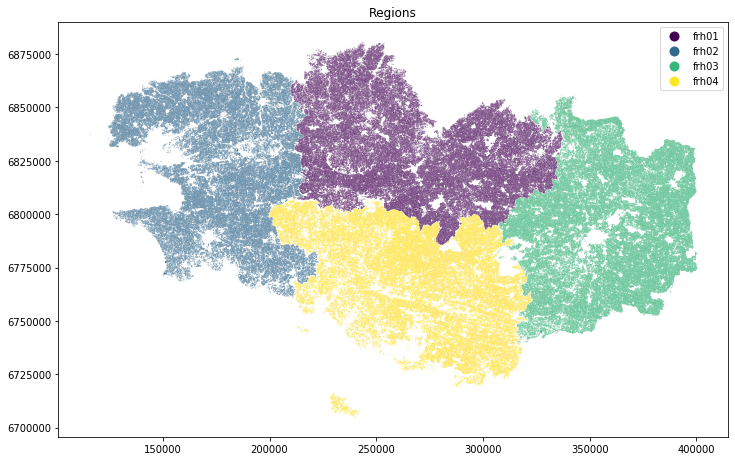

In [4]:
fig,ax = plt.subplots(figsize=(12,12))
ax.set_title("Regions")
rdf.plot(column="region",ax=ax, cmap='viridis', legend=True)

### Parcels colored by Class

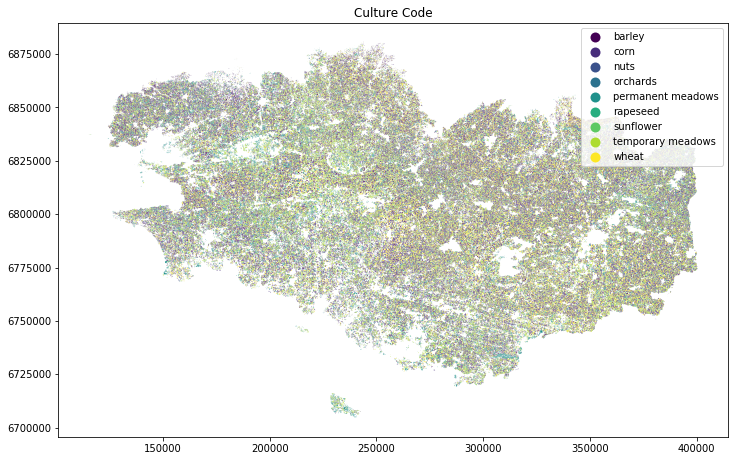

In [5]:
fig,ax = plt.subplots(figsize=(12,12))

mapping = frh01.mapping.reset_index()
rdf_ = rdf.loc[rdf["CODE_CULTU"].isin(frh01.mapping.index)]
gdf = pd.merge(rdf_, mapping, left_on="CODE_CULTU", right_on="code")

ax.set_title("Culture Code")
gdf.plot(column="classname",ax=ax, cmap='viridis', legend=True)

### Parcels colored by Cloud Coverage 
(mean QA60 over time)

/home/marc/miniconda3/envs/breizhcrops/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


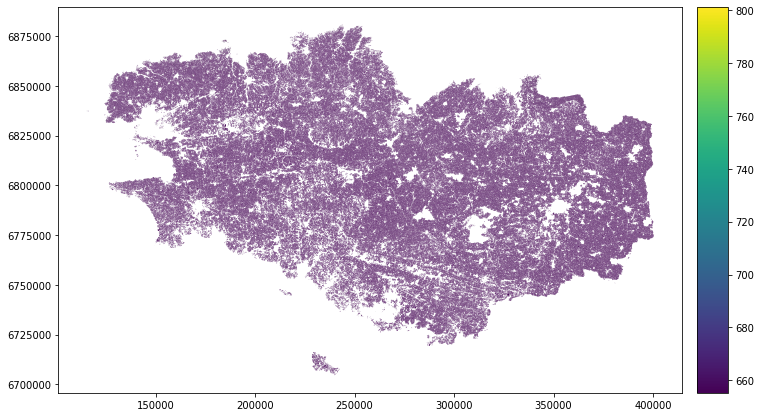

In [6]:
fig,ax = plt.subplots(figsize=(12,12))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
rdf.plot(column="meanQA60",ax=ax, cax=cax, cmap='viridis', legend=True)

### Parcels colored by Sequence Length

/home/marc/miniconda3/envs/breizhcrops/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


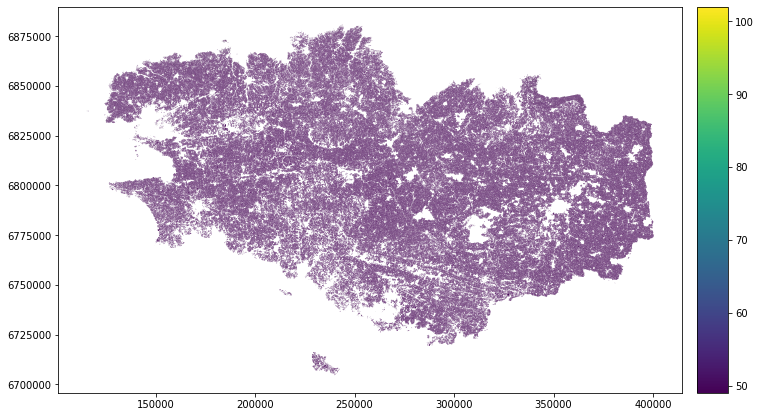

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax = plt.subplots(figsize=(12,12))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
rdf.plot(column="sequencelength",ax=ax, cax=cax, cmap='viridis', legend=True)

## Aggregation of crop type labels to 9 classes (using 19 Code Culture categories)

using a class mapping

In [8]:
selected_categories = len(frh01.index.CODE_CULTU.unique())
unique_categories = len(rdf.CODE_CULTU.unique())
mapping = frh01.mapping

print(f"aggregation of {unique_categories} unique categories to {selected_categories} in {len(mapping.id.unique())} classes")
print(mapping.classname.unique())

aggregation of 203 unique categories to 19 in 9 classes
['barley' 'wheat' 'rapeseed' 'corn' 'sunflower' 'orchards' 'nuts'
 'permanent meadows' 'temporary meadows']


In [9]:
mapping

,id,classname
code,,
ORH,0,barley
ORP,0,barley
BTH,1,wheat
BTP,1,wheat
CZH,2,rapeseed
CZP,2,rapeseed
MID,3,corn
MIE,3,corn
MIS,3,corn


### See complete number of codes via

In [10]:
frh01.get_codes().head()

,Libellé Culture,Code Groupe Culture,Libellé Groupe Culture
Code Culture,,,
BTH,Blé tendre d'hiver,1,Blé tendre
BTP,Blé tendre de printemps,1,Blé tendre
MID,Maïs doux,2,Maïs grain et ensilage
MIE,Maïs ensilage,2,Maïs grain et ensilage
MIS,Maïs,2,Maïs grain et ensilage


## Overview over number of samples per region

In [11]:
df = pd.DataFrame([
    ["frh01",len(frh01_gdf),len(pd.read_csv(frh01.indexfile)),len(pd.read_csv(frh01l2a.indexfile)),len(frh01),len(frh01l2a)],
    ["frh02",len(frh02_gdf),len(pd.read_csv(frh02.indexfile)),len(pd.read_csv(frh02l2a.indexfile)),len(frh02),len(frh02l2a)],
    ["frh03",len(frh03_gdf),len(pd.read_csv(frh03.indexfile)),len(pd.read_csv(frh03l2a.indexfile)),len(frh03),len(frh03l2a)],
    ["frh04",len(frh04_gdf),len(pd.read_csv(frh04.indexfile)),len(pd.read_csv(frh04l2a.indexfile)),len(frh04),len(frh04l2a)],
], columns=["region","parcels in shapefile","downloaded timeseries l1c", "downloaded timeseries l2a", "l1c samples in 9 classes", "l2a samples in 9 classes"]).set_index("region")
df.sum()

parcels in shapefile         768175
downloaded timeseries l1c    767504
downloaded timeseries l2a    766677
l1c samples in 9 classes     608263
l2a samples in 9 classes     608489
dtype: int64

## Histogram over class distribution

### Top of Atmosphere

In [12]:
rows = list()
for ds in [frh01,frh02,frh03,frh04]:
    row = ds.index.groupby(["id","classname"]).count()["CODE_CULTU"].to_dict()
    row["region"] = ds.region
    rows.append(row)
a = pd.DataFrame(rows).set_index("region").T
a.index = pd.MultiIndex.from_tuples(a.index, names=["id","classname"])
a.to_csv("/tmp/l1c_counts.csv")
a

,region,frh01,frh02,frh03,frh04
id,classname,,,,
0,barley,13046,10733,7148,5978
1,wheat,30368,15005,27189,16993
2,rapeseed,5593,2346,3557,3236
3,corn,43990,36593,41992,31333
4,sunflower,1,6,10,2
5,orchards,944,350,1223,553
6,nuts,10,18,10,11
7,permanent meadows,32650,36512,32534,26117
8,temporary meadows,52011,39082,52728,38391


### Bottom of Atmosphere

In [13]:
rows = list()
for ds in [frh01l2a,frh02l2a,frh03l2a,frh04l2a]:
    row = ds.index.groupby(["id","classname"]).count()["CODE_CULTU"].to_dict()
    row["region"] = ds.region
    rows.append(row)
a = pd.DataFrame(rows).set_index("region").T
a.index = pd.MultiIndex.from_tuples(a.index, names=["id","classname"])
a.to_csv("/tmp/l2a_counts.csv")
a

,region,frh01,frh02,frh03,frh04
id,classname,,,,
0,barley,13051,10736,7154,5981
1,wheat,30380,15026,27202,17009
2,rapeseed,5596,2349,3557,3244
3,corn,44003,36620,42011,31361
4,sunflower,1,6,10,2
5,orchards,937,348,1217,552
6,nuts,10,18,10,11
7,permanent meadows,32641,36536,32524,26134
8,temporary meadows,52013,39143,52682,38414


## Culture Codes

from https://www.data.gouv.fr/fr/datasets/registre-parcellaire-graphique-rpg-contours-des-parcelles-et-ilots-culturaux-et-leur-groupe-de-cultures-majoritaire/#_

In [14]:
pd.set_option('display.max_rows', None)
frh01.get_codes()

,Libellé Culture,Code Groupe Culture,Libellé Groupe Culture
Code Culture,,,
BTH,Blé tendre d'hiver,1,Blé tendre
BTP,Blé tendre de printemps,1,Blé tendre
MID,Maïs doux,2,Maïs grain et ensilage
MIE,Maïs ensilage,2,Maïs grain et ensilage
MIS,Maïs,2,Maïs grain et ensilage
ORH,Orge d'hiver,3,Orge
ORP,Orge de printemps,3,Orge
AVH,Avoine d'hiver,4,Autres céréales
AVP,Avoine de printemps,4,Autres céréales
